# Keras - Neural Network (Advanced)

Save model, set checkpoints, and plot History

## 1. Save your Model

#### 1.1 Save Your Neural Network Model to JSON

In [12]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [13]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [17]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))


# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])


# Fit the model
model.fit(X, Y, epochs=10, batch_size=10, verbose=0)


# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 66.54%


In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("./models/pima_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("./models/pima_model.h5")
print("Saved model to disk")    


Saved model to disk


##### Later

In [39]:
# load json and create model
json_file = open( './models/pima_model.json' ,  'r' )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


# load weights into new model
loaded_model.load_weights("./models/pima_model.h5")
print("Loaded model from disk")


# evaluate loaded model on test data
loaded_model.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 71.61%


-------

#### 1.2 Save Your Neural Network Model to YAML

In [25]:
# MLP for Pima Indians Dataset serialize to YAML and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_yaml
import numpy
import os


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])


# Fit the model
model.fit(X, Y, epochs=10, batch_size=10, verbose=0)


# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 65.10%


In [40]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("./models/pima_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
    
# serialize weights to HDF5
model.save_weights("./models/pima_model.h5")
print("Saved model to disk")

Saved model to disk


###### Later

In [41]:
# load YAML and create model
yaml_file = open( './models/pima_model.yaml' ,  'r' )
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights("./models/pima_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk
acc: 71.61%


----------

## 2. Keep The Best Models During Training With Checkpointing

##### 2.1 Checkpoint Neural Network Model Improvements

In [31]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]



# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
                
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [33]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath,
                             monitor= 'val_acc' ,
                             verbose=1,
                             save_best_only=True,
                             mode= 'max' )

callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y,
          validation_split=0.33,
          epochs=10,
          batch_size=10,
          callbacks=callbacks_list,
          verbose=0)

Epoch 00000: val_acc improved from -inf to 0.67323, saving model to weights-improvement-00-0.67.hdf5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc improved from 0.67323 to 0.69685, saving model to weights-improvement-03-0.70.hdf5
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve


##### 2.2 Checkpoint Best Neural Network Model Only

In [34]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))


# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [37]:
# checkpoint
filepath="./checkpoints/pima_best_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor= 'val_acc' ,
                             verbose=1,
                             save_best_only=True,
                             mode= max )

callbacks_list = [checkpoint]  


# Fit the model
model.fit(X, Y,
          validation_split=0.33,
          epochs=10,
          batch_size=10,
          callbacks=callbacks_list,
          verbose=0)


/Users/dibakarsigdel/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/callbacks.py:362: RuntimeWarning: ModelCheckpoint mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 00000: val_acc improved from -inf to 0.68504, saving model to ./checkpoints/pima_best_weights.best.hdf5
Epoch 00001: val_acc improved from 0.68504 to 0.68898, saving model to ./checkpoints/pima_best_weights.best.hdf5
Epoch 00002: val_acc improved from 0.68898 to 0.70079, saving model to ./checkpoints/pima_best_weights.best.hdf5
Epoch 00003: val_acc improved from 0.70079 to 0.70079, saving model to ./checkpoints/pima_best_weights.best.hdf5
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc improved from 0.70079 to 0.70472, saving model to ./checkpoints/pima_best_weights.best.hdf5
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc improved from 0.70472 to 0.71260, saving model to ./checkpoints/pima_best_weights.best.hdf5
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve


#### 2.3 Loading a Saved Neural Network Model

In [44]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# load weights
model.load_weights("./checkpoints/pima_best_weights.best.hdf5")


# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])


print("Created model and loaded weights from file")

# load pima indians dataset
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
acc: 71.61%


--------

### 3. Model History

In [45]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("./data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))


# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


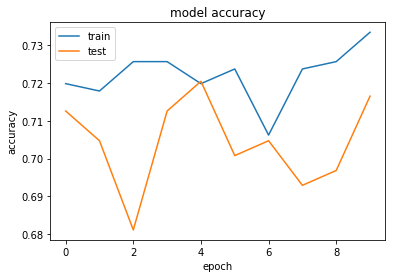

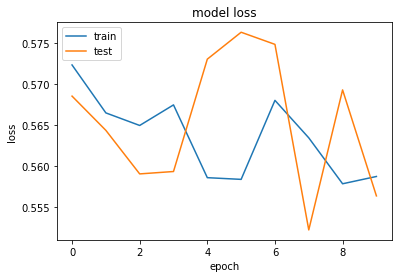

In [50]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history[ 'acc' ])
plt.plot(history.history[ 'val_acc' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' ,  'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' ,  'test' ], loc= 'upper left' )
plt.show()                                                                                         

----------